In [13]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [14]:
# Leitura do arquivo CSV usando pandas
df = pd.read_csv("Base.csv", encoding="latin-1", sep = ";")

Regressão Linear:
Erro Médio Quadrático (MSE): 21.217819486732502
Coeficiente de Determinação (R^2): 0.9472512532429218

Random Forest Regressor:
Erro Médio Quadrático (MSE): 26.847897806686625
Coeficiente de Determinação (R^2): 0.9332545475160455


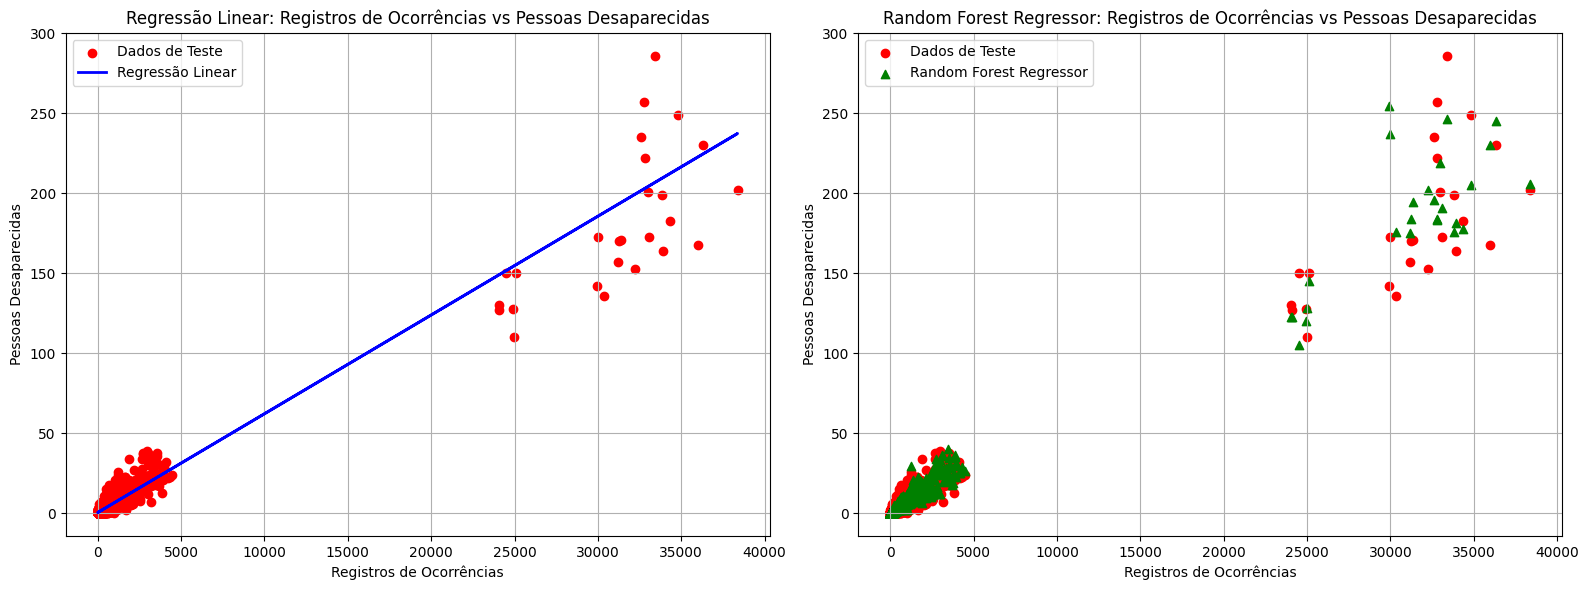

In [15]:
# Suponha que df seja o seu DataFrame original com os dados
df = df[["fmun","ano","mes", "pessoas_desaparecidas", "registro_ocorrencias"]]

# Tratamento inicial dos dados
df['dia'] = 1
df['data'] = pd.to_datetime(df['ano'].astype(str) + '/' + df['mes'].astype(str) + '/1')
df = df.drop(columns=["ano","mes", "dia"])
df = df[["fmun","data","pessoas_desaparecidas","registro_ocorrencias"]]
df.rename(columns={"fmun":"municipio"}, inplace=True)

# Dividir variáveis independentes e dependentes
X = df[['registro_ocorrencias']]
y = df['pessoas_desaparecidas']

# Dividir dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo 1: Regressão Linear
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Fazer previsões no conjunto de teste para Regressão Linear
y_pred_linear = model_linear.predict(X_test)

# Calcular métricas para Regressão Linear
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Modelo 2: Random Forest Regressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste para Random Forest Regressor
y_pred_rf = model_rf.predict(X_test)

# Calcular métricas para Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Impressão dos resultados
print("Regressão Linear:")
print("Erro Médio Quadrático (MSE):", mse_linear)
print("Coeficiente de Determinação (R^2):", r2_linear)
print()
print("Random Forest Regressor:")
print("Erro Médio Quadrático (MSE):", mse_rf)
print("Coeficiente de Determinação (R^2):", r2_rf)

# Plotagem dos resultados
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Regressão Linear
axs[0].scatter(X_test, y_test, color='red', label='Dados de Teste')
axs[0].plot(X_test, y_pred_linear, color='blue', linewidth=2, label='Regressão Linear')
axs[0].set_title('Regressão Linear: Registros de Ocorrências vs Pessoas Desaparecidas')
axs[0].set_xlabel('Registros de Ocorrências')
axs[0].set_ylabel('Pessoas Desaparecidas')
axs[0].legend()
axs[0].grid(True)

# Gráfico 2: Random Forest Regressor
axs[1].scatter(X_test, y_test, color='red', label='Dados de Teste')
axs[1].scatter(X_test, y_pred_rf, color='green', marker='^', label='Random Forest Regressor')
axs[1].set_title('Random Forest Regressor: Registros de Ocorrências vs Pessoas Desaparecidas')
axs[1].set_xlabel('Registros de Ocorrências')
axs[1].set_ylabel('Pessoas Desaparecidas')
axs[1].legend()
axs[1].grid(True)

# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()
